# Task 01

## Data Cleaning and PreProcessing

### Data Gathering

In [2]:
# Importing Libraries for Data Gathering
import os
import csv
import string
from collections import Counter
import glob

To process the files, the process_fasta_files function is used that process all .txt files in the given folder and store sequence data in a CSV file. This performs the following tasks:

1. Initialize a list to store all data
2. Get all txt files in the folder
3. Extract filename without extension as label
4. Find a header line, extract the sequence that follows
5. Continue reading sequence until we hit a blank line or another header
6. Count occurrences of each letter A-Z
7. Create a row with counts for each letter A-Z
8. This data is then written to CSV.



In [3]:
def process_fasta_files(folder_path, output_csv_path):
    all_data = []
    txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file_path in txt_files:
        filename = os.path.basename(file_path)
        label = os.path.splitext(filename)[0]
        
        with open(file_path, 'r') as file:
            lines = file.readlines()
            
            i = 0
            while i < len(lines):
                if lines[i].startswith('>'):
                    sequence = ""
                    i += 1  
                    
                    while i < len(lines) and not lines[i].startswith('>') and lines[i].strip():
                        sequence += lines[i].strip()
                        i += 1
                    
                    if sequence:
                        counter = Counter(sequence.upper())
                        row = {letter: counter.get(letter, 0) for letter in string.ascii_uppercase}
                        row['Label'] = label
                        
                        all_data.append(row)
                else:
                    i += 1
    
    if all_data:
        fieldnames = list(string.ascii_uppercase) + ['Label']
        
        with open(output_csv_path, 'w', newline='') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(all_data)
        
        print(f"Data successfully saved to {output_csv_path}")
    else:
        print("No data was processed.")

In [4]:
input_folder = "Dataset"
output_csv = "genome_sequences.csv"

process_fasta_files(input_folder, output_csv)

Data successfully saved to genome_sequences.csv


The output file with the name of "genome_sequences.csv" is created.

### Data Cleaning

In [5]:
# Importing libraries for Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
# Reading the Dataset
df = pd.read_csv("genome_sequences.csv")
df.head()

,A,B,C,D,E,F,G,H,I,J,...,R,S,T,U,V,W,X,Y,Z,Label
0,3,0,0,0,1,3,1,0,2,0,...,1,1,4,0,5,0,0,0,0,Envelope
1,3,0,0,0,1,3,1,0,2,0,...,1,1,4,0,5,0,0,0,0,Envelope
2,3,0,0,0,1,3,1,0,2,0,...,1,1,4,0,5,0,0,0,0,Envelope
3,3,0,0,0,1,3,1,0,2,0,...,1,1,4,0,5,0,0,0,0,Envelope
4,3,0,0,0,1,3,1,0,2,0,...,1,1,4,0,5,0,0,0,0,Envelope


This shows that we have 27 columns. The 26 columns shows occurence of each letter from A to Z. The Label column shows the type of Virus.

In [7]:
# Checking the Columns
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Label'],
      dtype='object')

In [8]:
# Checking the statistics
df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,4020.000000,4020.0,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.0,...,4020.000000,4020.000000,4020.000000,4020.000000,4020.0,4020.000000,4020.000000,4020.000000,4020.000000,4020.0
mean,38.308458,0.0,10.302985,25.533831,19.186070,27.981841,40.056468,8.512687,28.735572,0.0,...,28.290299,24.236318,42.600746,39.254726,0.0,33.449502,6.180597,0.036567,20.989552,0.0
std,40.851248,0.0,19.534525,32.612858,29.012472,35.826667,40.553769,12.224596,33.498266,0.0,...,28.313182,20.061522,45.158426,48.005088,0.0,52.571327,6.124260,1.014651,28.552608,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,18.000000,0.0,0.000000,5.000000,7.000000,11.000000,14.000000,4.000000,14.000000,0.0,...,3.000000,14.000000,15.000000,13.000000,0.0,8.000000,5.000000,0.000000,9.000000,0.0
50%,37.000000,0.0,3.000000,24.000000,11.000000,13.000000,42.000000,4.000000,14.000000,0.0,...,34.000000,29.000000,35.000000,32.000000,0.0,13.000000,5.000000,0.000000,11.000000,0.0
75%,37.000000,0.0,8.000000,24.000000,11.000000,14.000000,42.000000,7.000000,20.000000,0.0,...,35.000000,29.000000,36.000000,32.000000,0.0,20.000000,7.000000,0.000000,15.000000,0.0
max,488.000000,0.0,227.000000,389.000000,340.000000,351.000000,412.000000,145.000000,345.000000,0.0,...,239.000000,244.000000,457.000000,527.000000,0.0,599.000000,78.000000,54.000000,336.000000,0.0


In [9]:
df.dtypes

A         int64
B         int64
C         int64
D         int64
E         int64
F         int64
G         int64
H         int64
I         int64
J         int64
K         int64
L         int64
M         int64
N         int64
O         int64
P         int64
Q         int64
R         int64
S         int64
T         int64
U         int64
V         int64
W         int64
X         int64
Y         int64
Z         int64
Label    object
dtype: object

All the columns are numerical except for the label column. Later on, we will change it into numerical column using Label Encoding.

### Checking for Null values

In [10]:
df.isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
P        0
Q        0
R        0
S        0
T        0
U        0
V        0
W        0
X        0
Y        0
Z        0
Label    0
dtype: int64

There are no null values. However, there can be some column that can be entirely zero. For them Let's check for the unique values in each column. If all the values in any column is zero, it will be dropped since that letter does not exist in our genome sequence.

In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("*************")

A
[  3   0   4   5  19  17  18  10  81  13  15  79   1 309 487  77   2  37
   8 310 488   9  80 486  38  78  26  25  36  75  84  82  76  12  74  14
  72  83  11  41  71   6  88]
*************
B
[0]
*************
C
[  0   3   4  30   2   7  40 138 227  31 226   1   6 139 137 225  29   8
  32  21   9  10  28  34]
*************
D
[  0   1   6   3  11   5  61  60   4  13 211 389  52  62  24   7   2  10
  23  25  22  53  58   9  59  64  31  14   8  51  50  63  28  57  66]
*************
E
[  1   0   2   8   5   7   4  51  48  11 239 340  40  12   6   3 238 339
  47  49  53  50  46  24  14  39  52  13  44  22  45  10]
*************
F
[  3   0   5  12  11   9  79  10   7  76  14  77 209 350  73 208 349   4
  13   8   6 210 351   1  75  71  81  78  80  74  15  16  49   2  27  22
  70  29  24  72  69]
*************
G
[  1   0  14  13  15   5  94  12  11  85  83 264 412  79  82  43   4 263
 411  33  34  32  42  41  39  72  74 104  92  96  95  80  75  91  90  78
  93  49  97  84  16  76  20  17  8

To better visualize, we will plot a chart.

<Axes: title={'center': 'Unique Values per Column'}>

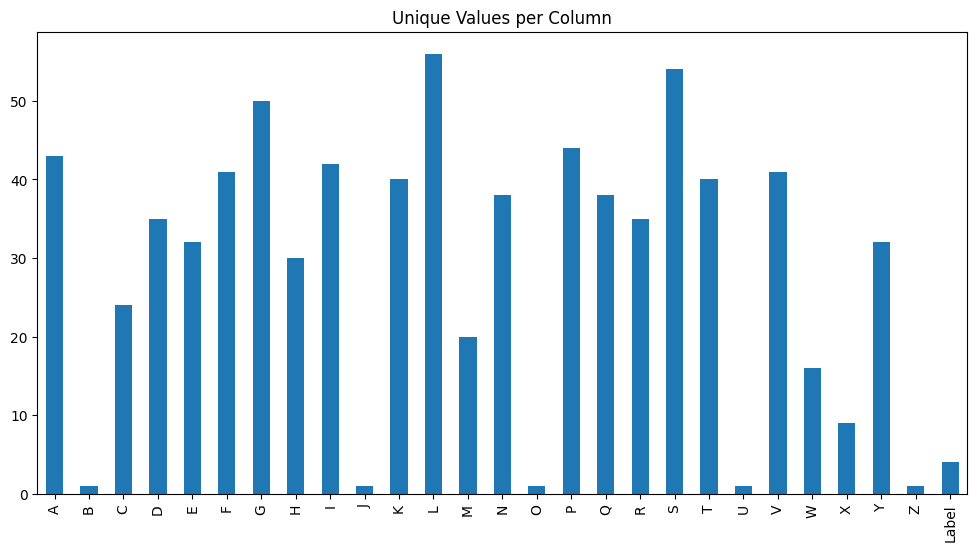

In [12]:
unique_counts = df.nunique()

# Visualize using bar plot
unique_counts.plot(kind='bar', figsize=(12, 6), title='Unique Values per Column')

It can be seen that 5 letters does not exist in genome sequence which are 'B', 'J', 'O', 'U' and 'Z'. These columns will be dropped.

In [13]:
column_to_drop = ['B', 'J', 'O', 'U', 'Z']
df1 = df.drop(columns=column_to_drop)
df1.head()

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,X,Y,Label
0,3,0,0,1,3,1,0,2,0,9,...,0,0,1,1,4,5,0,0,0,Envelope
1,3,0,0,1,3,1,0,2,0,9,...,0,0,1,1,4,5,0,0,0,Envelope
2,3,0,0,1,3,1,0,2,0,9,...,0,0,1,1,4,5,0,0,0,Envelope
3,3,0,0,1,3,1,0,2,0,9,...,0,0,1,1,4,5,0,0,0,Envelope
4,3,0,0,1,3,1,0,2,0,9,...,0,0,1,1,4,5,0,0,0,Envelope


## Outliers

Outliers can affect the data very severely. So, Removing them is necessary to keep our data clean.

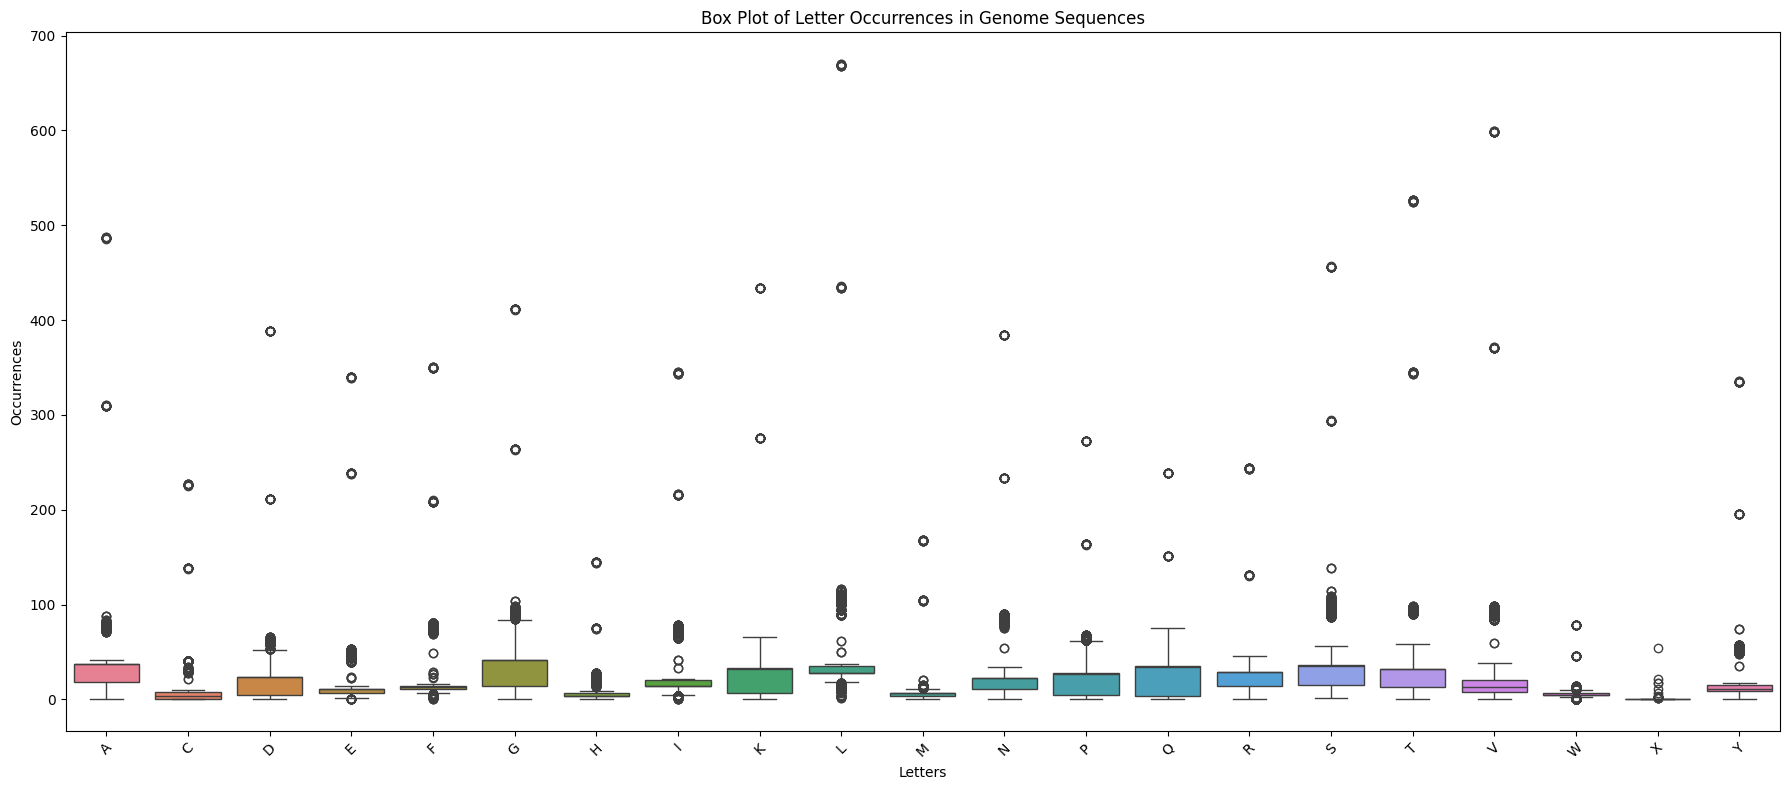

In [14]:
numeric_df = df1.select_dtypes(include='number')  # Automatically picks numerical columns

# Set plot size
plt.figure(figsize=(18, 8))

# Create boxplot
sns.boxplot(data=numeric_df)

plt.title("Box Plot of Letter Occurrences in Genome Sequences")
plt.xlabel("Letters")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The dataset seems to have a lot of outliers. Using IQR Range to remove Outliers.

In [15]:
numeric_cols = df1.select_dtypes(include='number').columns

# IQR-based filtering
for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

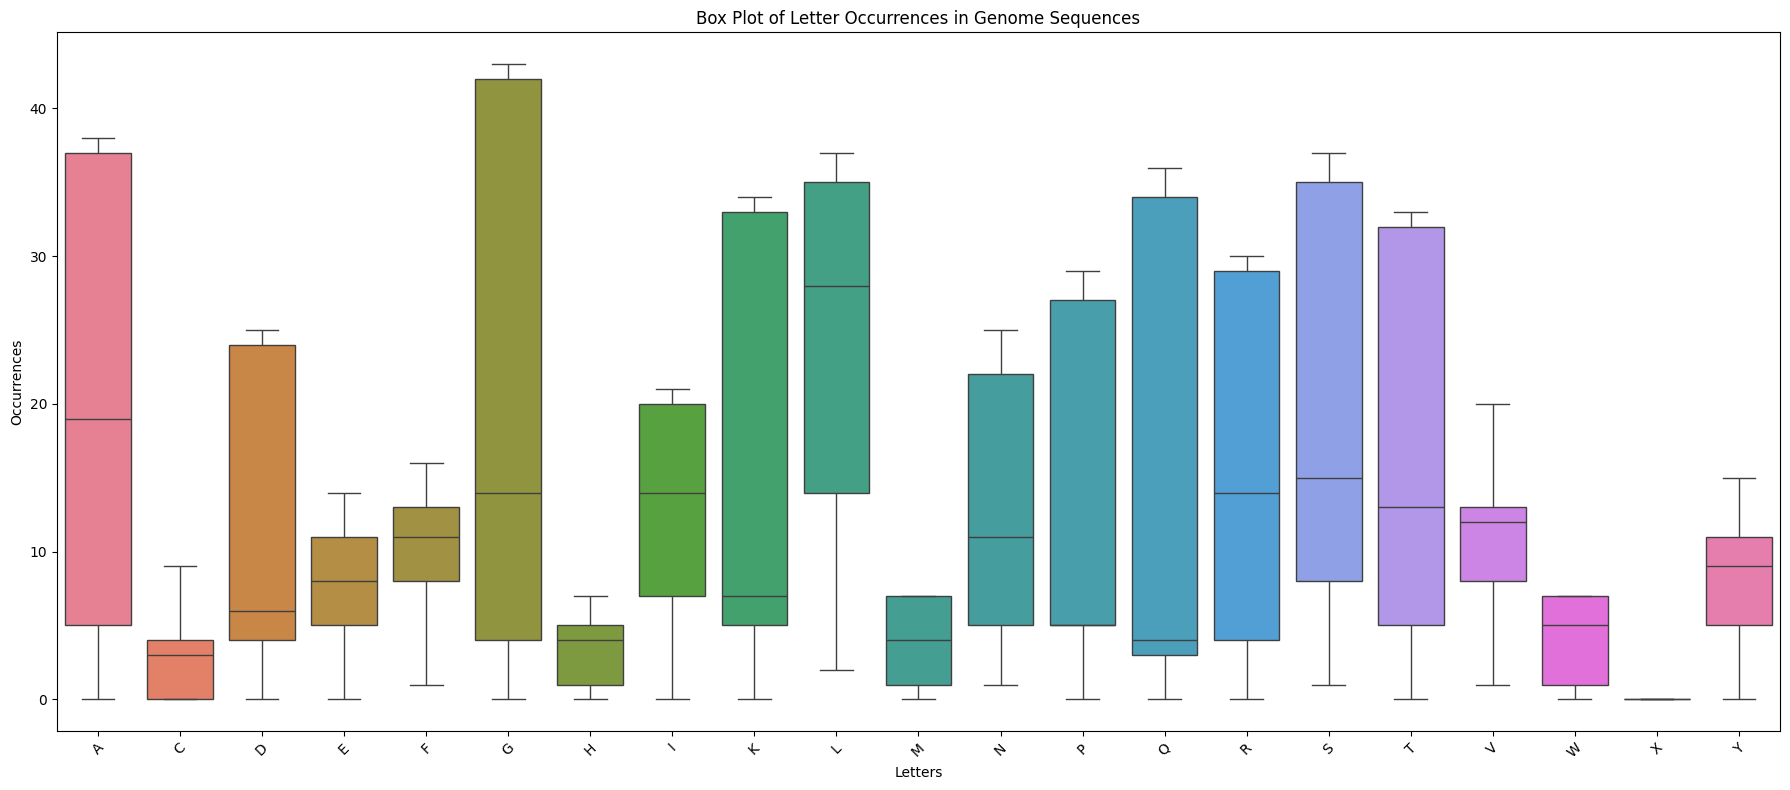

In [16]:
numeric_df = df1.select_dtypes(include='number')  # Automatically picks numerical columns

# Set plot size
plt.figure(figsize=(18, 8))

# Create boxplot
sns.boxplot(data=numeric_df)

plt.title("Box Plot of Letter Occurrences in Genome Sequences")
plt.xlabel("Letters")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now, our data is clean and outliers are removed. However, the column 'X' has lost all its values. Dropping it since it does not provide any information now.

In [17]:
df1 = df1.drop(columns = ['X'])
df1.head()

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,Label
0,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,Envelope
1,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,Envelope
2,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,Envelope
3,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,Envelope
4,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,Envelope


### Label Encoding

Moving on to our labels which are in categorical format. This will be converted into numerical format using label encoding.

In [18]:
label_encoder = LabelEncoder()

# Apply encoding to 'label' column
df1['label_encoded'] = label_encoder.fit_transform(df1['Label'])

# Optional: See the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)



Label Mapping: {'Envelope': np.int64(0), 'Membrane': np.int64(1), 'Nucleocapsid': np.int64(2), 'Spike': np.int64(3)}


Now, our dataet is cleaned. We can save it to a new csv file.

In [19]:
df1 = df1.drop(columns=['Label'])
df1.head()

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,label_encoded
0,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,0
1,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,0
2,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,0
3,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,0
4,3,0,0,1,3,1,0,2,0,9,...,1,0,0,1,1,4,5,0,0,0


In [20]:
df1.to_csv("genome_sequences_cleaned.csv", index=False)

### Visualizing RelationShips

In [21]:
df = pd.read_csv("genome_sequences_cleaned.csv")

#### Correlation Matrix

In [22]:
correlation_matrix = df.corr()

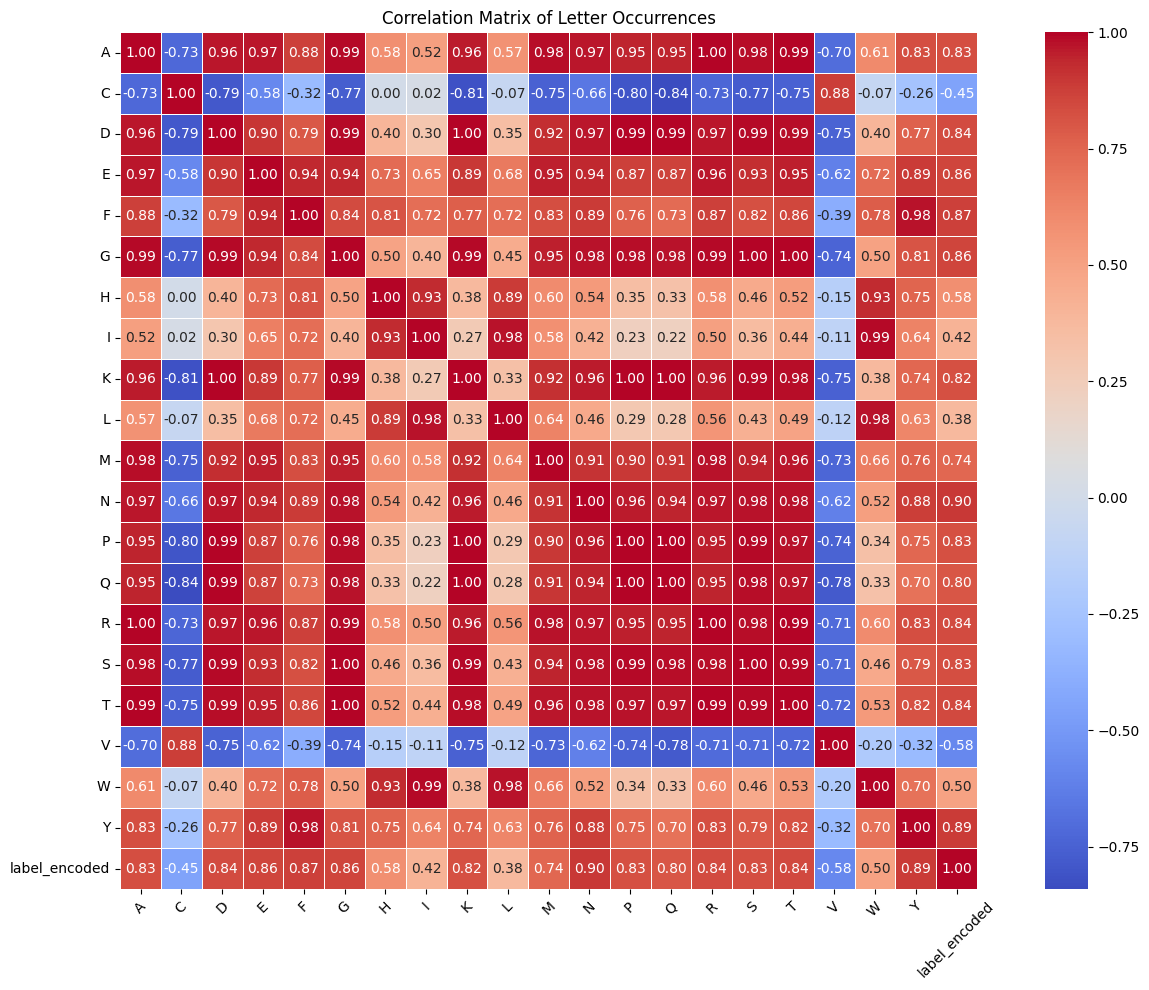

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Letter Occurrences")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Scatter Plot

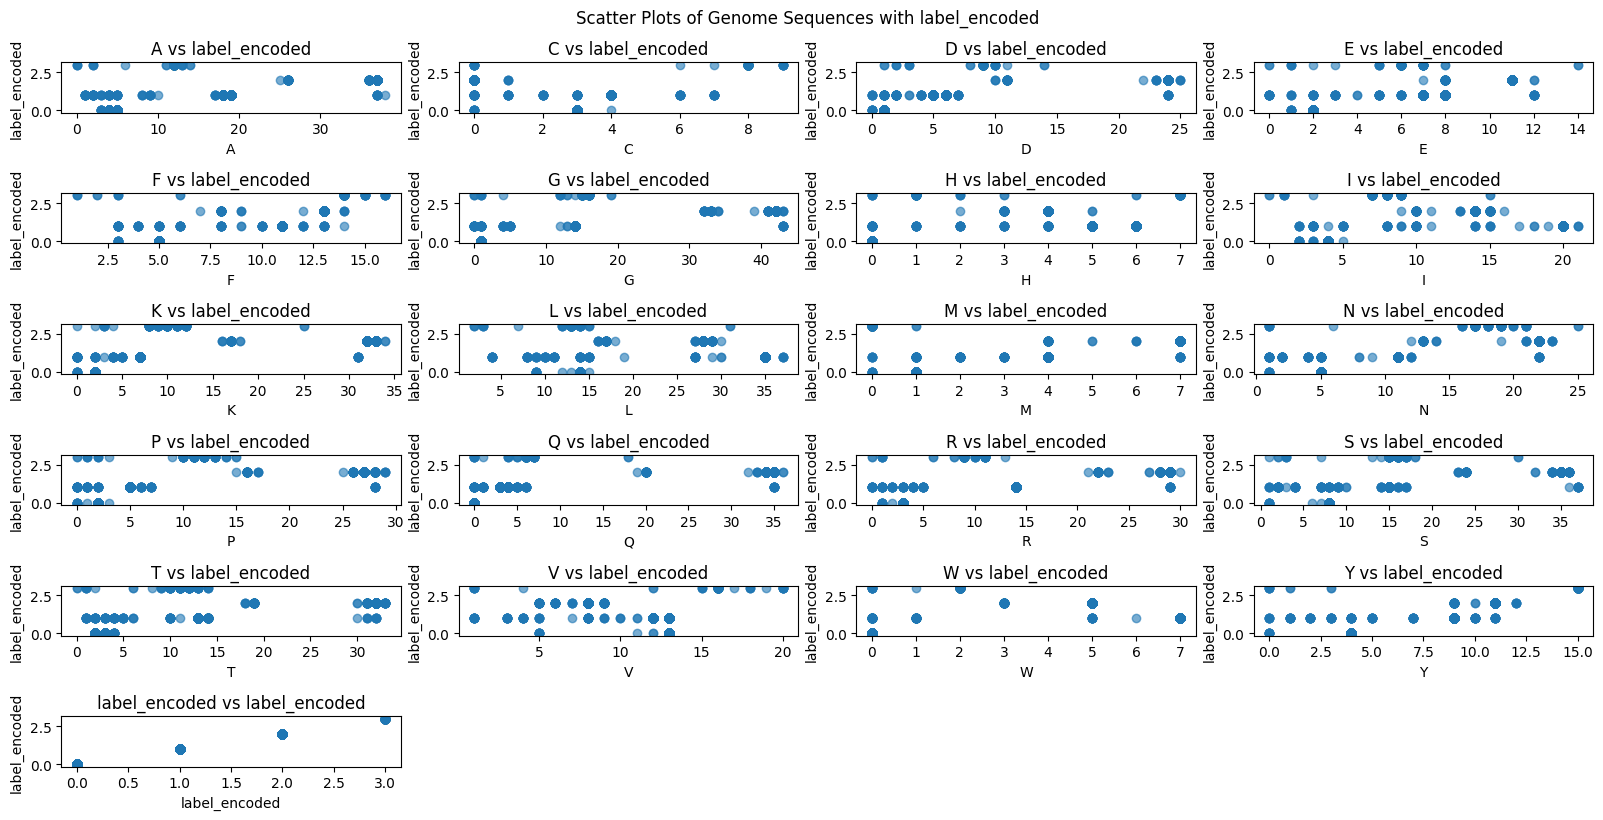

In [24]:
columns_to_plot = list(df) + ['label_encoded'] 

n_cols = 4 
n_rows = len(columns_to_plot) // n_cols + (len(columns_to_plot) % n_cols != 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 8))

axes = axes.flatten()
for i, col in enumerate(columns_to_plot[:-1]):  
    axes[i].scatter(df[col], df['label_encoded'], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('label_encoded')
    axes[i].set_title(f'{col} vs label_encoded')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Scatter Plots of Genome Sequences with label_encoded", y=1.02)
plt.show()

### Linear Regression Model

Mean Squared Error: 0.014782813972398019
R2 Score: 0.9798205205818837


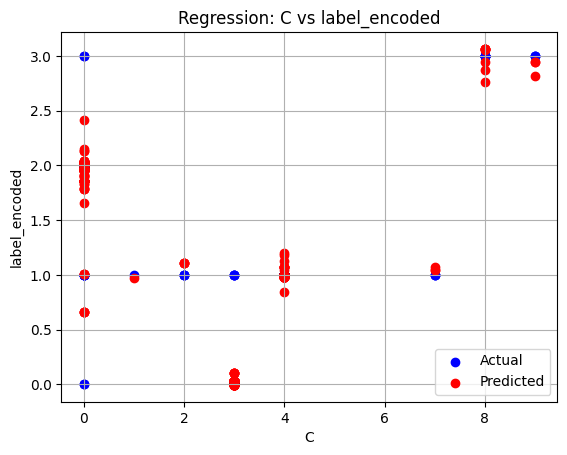

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Split features and label
y = df['label_encoded']
X = df.drop(columns=['label_encoded'])
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializin and train regression model
model_linear = LinearRegression()  
model_linear.fit(X_train, y_train)
y_pred1 = model_linear.predict(X_test)
mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
feature_name = 'C'  
plt.scatter(X_test[feature_name], y_test1, color='blue', label='Actual')
plt.scatter(X_test[feature_name], y_pred1, color='red', label='Predicted')
plt.title(f'Regression: {feature_name} vs label_encoded')
plt.xlabel(feature_name)
plt.ylabel('label_encoded')
plt.legend()
plt.grid(True)
plt.show()





### Analysis

The results of my linear regression model show that it is working very well. The Mean Squared Error (MSE) is very low, only 0.0147, which means the difference between the predicted and actual values is small. This shows that the model is making accurate predictions. Also, the R2 Score is 0.97, which means that about 98% of the variation in the data is explained by the model. A higher R2 Score indicates a better fit, so this score shows that my model fits the data quite well. SO these results show that my linear regression model is performing effectively and is reliable for making predictions.

### DecisionTreeRegressor

In [26]:

from sklearn.tree import DecisionTreeRegressor  
# Initialize and train regression model
model_tree = DecisionTreeRegressor() 
model_tree.fit(X_train, y_train)
# Predicton on test set
y_pred2 = model_tree.predict(X_test)
mse = mean_squared_error(y_test1, y_pred2)
r2 = r2_score(y_test1, y_pred2)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.00505657780386401
R2 Score: 0.993097450329166


### Analysis

The results of my Decision Tree Regression model show that it is performing extremely well. The Mean Squared Error (MSE) is very low, only 0.0050, which means that the difference between the predicted values and the actual values is very small. This shows that the model is making highly accurate predictions. The R2 Score is 0.99, which means that 99% of the variation in the data is explained by the model. This is a very high score and indicates that the model fits the data almost perfectly. 

### Multivariable Linear Regression


In [27]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y = df['label_encoded']
X = df.drop(columns=['label_encoded'])
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#using LinearRegression Model
model_mlinear = LinearRegression()
model_mlinear.fit(X_train, y_train)
# Predict
y_pred = model_mlinear.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))
print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression MSE: 0.014782813972398019
Linear Regression R2: 0.9798205205818837


### Analysis

The results of my multivariable Linear Regression model show that it is working quite well. The Mean Squared Error (MSE) is 0.0147, which means that the difference between the predicted values and the actual values is small. This shows that the model is making fairly accurate predictions. The R2 Score is 0.97, which means that 97% of the variation in the data is explained by the model. This is a strong indication that the model fits the data properly. So this model is good for prediction.

### Polynomial Regression (Single Variable)


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Choose a single feature
X_single = df[['A']]  
y = df['label_encoded']
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_single)
X_train, X_test, y_train, y_test_p1 = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)
y_pred_p1 = model_poly.predict(X_test)
print("Polynomial Regression (Single Var) MSE:", mean_squared_error(y_test_p1, y_pred_p1))
print("Polynomial Regression (Single Var) R2:", r2_score(y_test_p1, y_pred_p1))

Polynomial Regression (Single Var) MSE: 0.17405003220589912
Polynomial Regression (Single Var) R2: 0.762410658134551


### Analysis

The results of my Polynomial Regression (Single Variable) model show that it is not performing as well as the other models. The Mean Squared Error (MSE) is 0.1740, which is higher compared to my other models. This means the difference between the predicted and actual values is larger, so the predictions are not very accurate. The R2 Score is 0.76, which means the model explains about 76% of the variation in the data. It shows that the model is not fitting the data as well as it could. 

### Multivariable Polynomial Regression Degree 2

In [29]:
# Using  all features
X = df.drop(columns=['label_encoded'])
y = df['label_encoded']
# polynomial features for degree=2
poly2 = PolynomialFeatures(degree=2)
X_poly = poly2.fit_transform(X)
# Split
X_train, X_test, y_train, y_test_p2 = train_test_split(X_poly, y, test_size=0.2, random_state=42)
# Training model
model_poly2 = LinearRegression()
model_poly2.fit(X_train, y_train)
y_pred_p2 = model_poly2.predict(X_test)
print("Multivariable Polynomial Regression MSE:", mean_squared_error(y_test_p2, y_pred_p2))
print("Multivariable Polynomial Regression R2:", r2_score(y_test_p2, y_pred_p2))


Multivariable Polynomial Regression MSE: 0.006054414687981429
Multivariable Polynomial Regression R2: 0.9917353396441988


### Analysis

The results of my Multivariable Polynomial Regression (Degree 2) model show that it is performing really well. The Mean Squared Error (MSE) is very low, only 0.0060, which means the difference between the predicted values and the actual values is very small. This shows that the model is making accurate predictions. The R2 Score is 0.99, which means that 99% of the variation in the data is explained by the model. This is a very strong result and shows that the model fits the data almost perfectly. 

### Multivariable Polynomial Regression Degree 3

In [30]:
# Degree 3 
poly3 = PolynomialFeatures(degree=3)
X_poly = poly3.fit_transform(X)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly3 = LinearRegression()
model_poly3.fit(X_train3, y_train3)
y_pred3 = model_poly3.predict(X_test3)
print("Degree 3 Polynomial Regression:")
print("MSE:", mean_squared_error(y_test3, y_pred3))
print("R2 Score:", r2_score(y_test3, y_pred3))


Degree 3 Polynomial Regression:
MSE: 0.005611845782255587
R2 Score: 0.9923394742927757


### Analysis

The results of my Multivariable Polynomial Regression model with degree 3 show that it is performing very well. The Mean Squared Error (MSE) is 0.0056, which is quite low, meaning that the difference between the predicted and actual values is very small. This shows that the model is making accurate predictions. The R2 Score is 0.99, which means the model explains about 99% of the variation in the data. This is a very high score and shows that the model fits the data really well. This model can be used for prediction because it is giving very good results.

## Generate KDE Plot

## KDE for Linear Regression

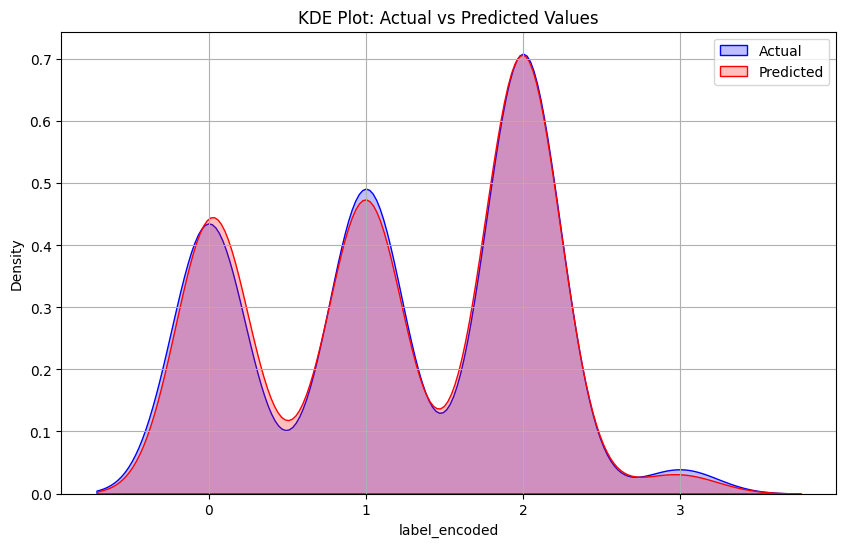

In [31]:
import seaborn as sns

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test1, fill=True, label='Actual', color='blue')
sns.kdeplot(y_pred1, fill=True, label='Predicted', color='red')
plt.title('KDE Plot: Actual vs Predicted Values')
plt.xlabel('label_encoded')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


 The red (predicted) and blue (actual) curves are almost the same. This means the model is performing best.Its predictions closely match the real values. Both curves have similar peaks and shapes, showing that the model understands the pattern in the data. There’s no big bias, and it doesn’t look like the model is underfitting or overfitting. The small differences in some areas are normal and acceptable.

## KDE for Decision Tree Regression

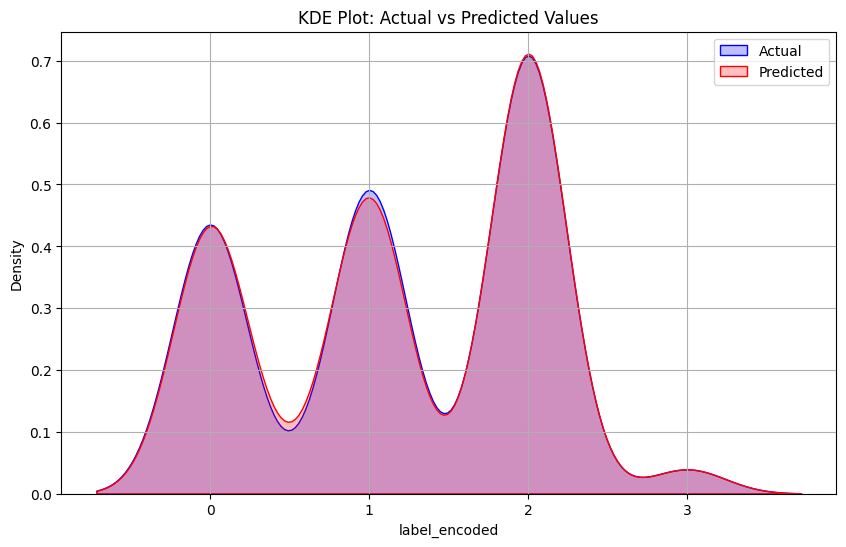

In [32]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test1, fill=True, label='Actual', color='blue')
sns.kdeplot(y_pred2, fill=True, label='Predicted', color='red')
plt.title('KDE Plot: Actual vs Predicted Values')
plt.xlabel('label_encoded')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


The blue line is the actual data, and the red line is predicted data. Both lines are very close to each other, which means the model is perfect. The peaks happen at the same places, showing that the model understood the patterns well. But overall, the predictions are very close to the real values.

## KDE for Multivariable Linear Regression

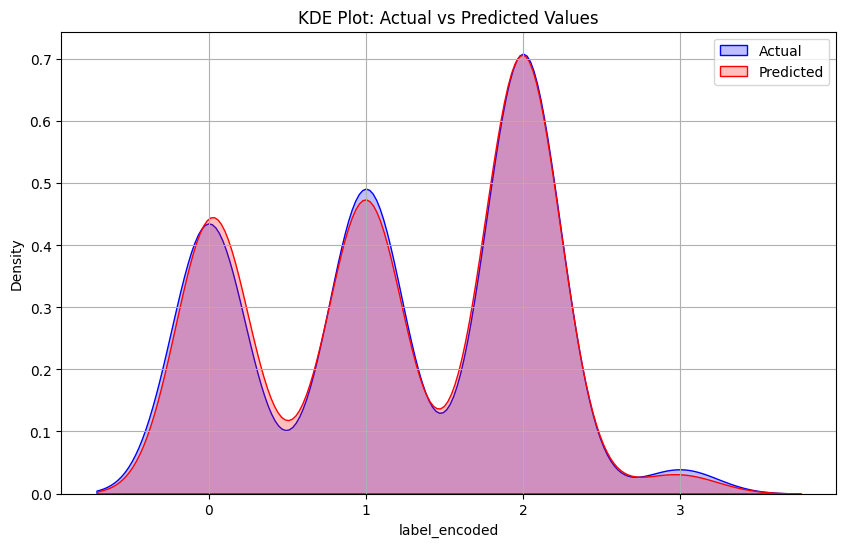

In [33]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, fill=True, label='Actual', color='blue')
sns.kdeplot(y_pred, fill=True, label='Predicted', color='red')
plt.title('KDE Plot: Actual vs Predicted Values')
plt.xlabel('label_encoded')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


This plot shows that the predicted values (red) are very close to the actual values (blue). The shapes of both lines match well across all peaks, meaning the model has learned the data patterns accurately. There are only small differences in height at some points, but overall, the predictions are strong. This suggests the model is performing well — neither underfitting nor overfitting.

## KDE for Single variable Polynomial Regression

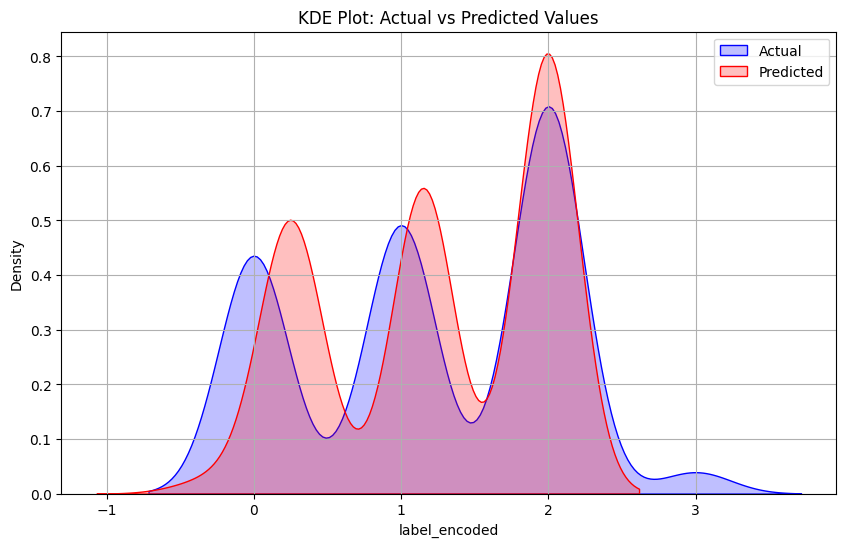

In [34]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_p1, fill=True, label='Actual', color='blue')
sns.kdeplot(y_pred_p1, fill=True, label='Predicted', color='red')
plt.title('KDE Plot: Actual vs Predicted Values')
plt.xlabel('label_encoded')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


The red line doesn't perfectly match the blue line. The red peaks appear shifted slightly to the right, meaning the model is consistently guessing numbers that are a bit too high. Both lines show three main bumps, but the red bumps are taller and narrower than the blue ones. Also, there's a small blue tail on the far right that the red line completely misses, showing the model doesn't account for some higher values.

## KDE for Degree 2 Polynomial Regression

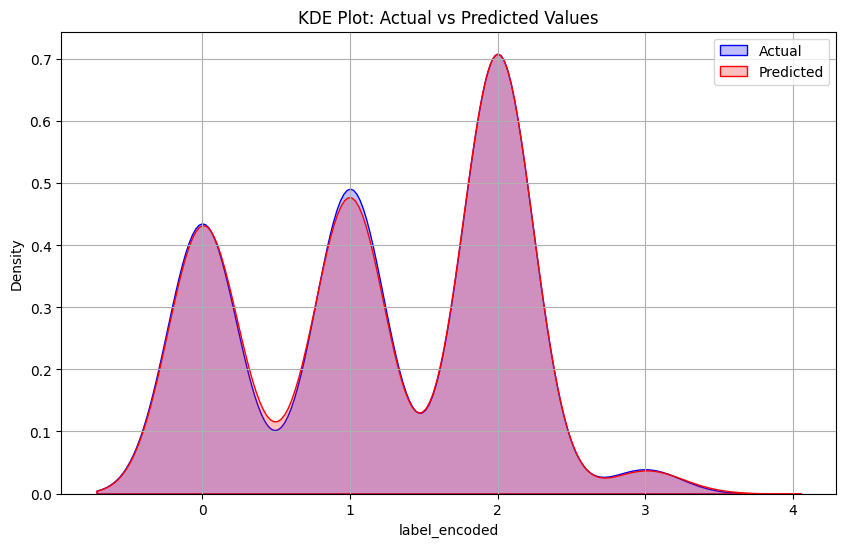

In [35]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_p2, fill=True, label='Actual', color='blue')
sns.kdeplot(y_pred_p2, fill=True, label='Predicted', color='red')
plt.title('KDE Plot: Actual vs Predicted Values')
plt.xlabel('label_encoded')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


This plot shows a big problem with the predictions. The blue line (actual values) is sharp and high, while the red line (predicted values) is almost flat and very low. This means the model did not learn the actual pattern well. The predicted values are far off and don’t follow the actual data.The plot is underfitting.

## KDE for Degree 3 Polynomial Regression

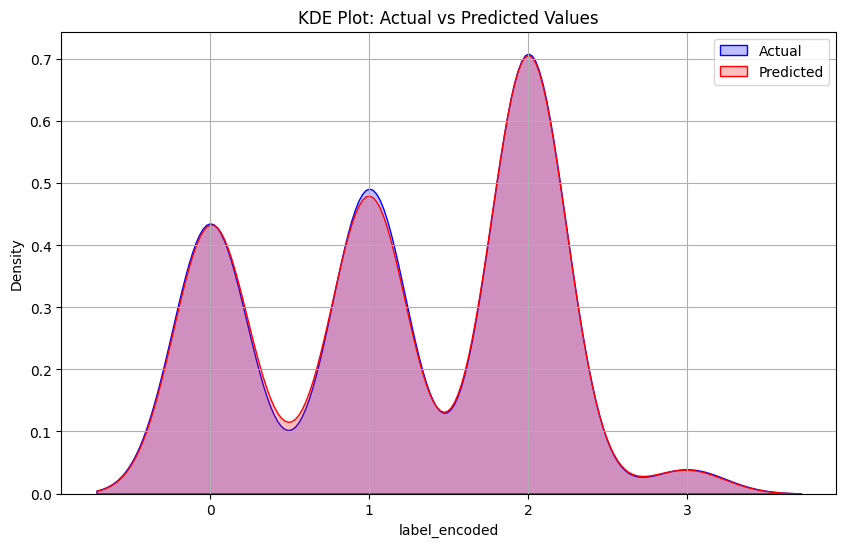

In [36]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test3, fill=True, label='Actual', color='blue')
sns.kdeplot(y_pred3, fill=True, label='Predicted', color='red')
plt.title('KDE Plot: Actual vs Predicted Values')
plt.xlabel('label_encoded')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


This plot shows a big problem with the predictions. The blue line (actual values) is sharp and high, while the red line (predicted values) is almost flat and very low. This means the model did not learn the actual pattern well. The predicted values are far off and don’t follow the actual data.The plot is underfitting.

## Predicting the Label

In [37]:
import math
classes = ['Envelope', 'Membrane', 'Nucleocapsid', 'Spike']

### Linear Regression - Single Variable

In [38]:
def predict(sequence):
    counter = Counter(sequence.upper())
    row = {letter: counter.get(letter, 0) for letter in string.ascii_uppercase}
    df = pd.DataFrame(row, index=[0])
    df = df.drop(columns = ['B', 'J', 'O', 'U', 'X', 'Z'])
    prediction = model_linear.predict(df)
    return prediction
    

prediction = predict("MSDNGPQNQRNALRITFGGPSDSTGSNQNGGARSKQRRPQGLPNNTASWFTALTQHGKEDLKFPRGQGVPINTNSSPDDQIGYYRRATRRIRGGDGKMKDLSPRWYFYYLGTGPEAGLPYGANKDGIIWVATEGALNTPKDHIGTRNPANNAAIVLQLPQGTTLPKGFYAEGSRGGSQASSRSSSRSRNSSRNSTPGSSKRTSPARMAGNGGDAALALLLLDRLNKLESKMSGKGQQQQGQTVTKKSAAEASKKPRQKRTATKAYNVTQAFGRRGPEQTQGNFGDQELIRQGTDYKHWPQIAQFAPSASAFFGMSRIGMEVTPSGTWLTYTGAIKLDDKDPNFKDQVILLNKHIDAYKTFPPTEPKKDKKKKADETQALPQRQKKQQTVTLLPAADLDDFSKQLQQSMSRADSTQA")
predicted_index = round(prediction[0])
predicted_class = classes[predicted_index]
print(predicted_class)

Nucleocapsid


### Decision Tree Regression

In [39]:
def predict(sequence):
    counter = Counter(sequence.upper())
    row = {letter: counter.get(letter, 0) for letter in string.ascii_uppercase}
    df = pd.DataFrame(row, index=[0])
    df = df.drop(columns = ['B', 'J', 'O', 'U', 'X', 'Z'])
    prediction = model_tree.predict(df)
    return prediction
    

prediction = predict("""MGCVAETGHHHHHHTNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLN
DLCFTNVYADSFVIRGDEVRQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRK
SNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGKK""")
predicted_index = round(prediction[0])
predicted_class = classes[predicted_index]
print(predicted_class)


Spike


### MultiVariable Linear Regression 

In [40]:
def predict(sequence):
    counter = Counter(sequence.upper())
    row = {letter: counter.get(letter, 0) for letter in string.ascii_uppercase}
    df = pd.DataFrame(row, index=[0])
    df = df.drop(columns = ['B', 'J', 'O', 'U', 'X', 'Z'])
    prediction = model_mlinear.predict(df)
    return prediction
    

prediction = predict("""MYSFVSEEIGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSSRV
PDLLV""")
predicted_index = round(prediction[0])
predicted_class = classes[predicted_index]
print(predicted_class)

Envelope


### Polynomial with Single Variable

In [41]:
def predict(sequence):
    counter = Counter(sequence.upper())
    row = {letter: counter.get(letter, 0) for letter in string.ascii_uppercase}
    df = pd.DataFrame(row, index=[0])
    df = df.drop(columns = ['B', 'J', 'O', 'U', 'X', 'Z'])
    df = df[['A']]
    X_poly = poly.transform(df)
    prediction = model_poly.predict(X_poly)
    print(prediction)
    return prediction
    

prediction = predict("""MGCVAETGHHHHHHTNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLN
DLCFTNVYADSFVIRGDEVRQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRK
SNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGKK""")
predicted_index = round(prediction[0])
predicted_class = classes[predicted_index]
print(predicted_class)

[1.11557666]
Membrane


### Multivariable Polynomial with Degree 2

In [42]:
def predict(sequence):
    counter = Counter(sequence.upper())
    row = {letter: counter.get(letter, 0) for letter in string.ascii_uppercase}
    df = pd.DataFrame(row, index=[0])
    df = df.drop(columns = ['B', 'J', 'O', 'U', 'X', 'Z'])
    X_poly = poly2.transform(df)
    prediction = model_poly2.predict(X_poly)
    return prediction
    

prediction = predict("""MAHSNGTITVEELKKLLEEWNLVIGFLFLAWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLTCFVLAAV
YRINWITGGIAIAMACLVGLMWLSYFIASFRLFVRTRSMWSFNPETNILLNVPLHGTILTRPLLESELVI
GAVILRGHLRIAGHHLGRCDIKDLPKEITVATSRTLSYYKLGASQRVAGDSGFAAYSRYRIGNYKLNTDH
SSSSDNIALLVQ""")
predicted_index = round(prediction[0])
predicted_class = classes[predicted_index]
print(predicted_class)


Membrane


### Multivariable Polynomial with Degree 3

In [43]:
def predict(sequence):
    counter = Counter(sequence.upper())
    row = {letter: counter.get(letter, 0) for letter in string.ascii_uppercase}
    df = pd.DataFrame(row, index=[0])
    df = df.drop(columns = ['B', 'J', 'O', 'U', 'X', 'Z'])
    X_poly = poly3.transform(df)
    prediction = model_poly3.predict(X_poly)
    print(prediction)
    return prediction
    
prediction = predict("""MADSNGTITVEELKKLLEEWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLTCFVLAAV
YRINWIT""")
predicted_index = round(prediction[0])
predicted_class = classes[predicted_index]
print(predicted_class)


[2.2524892]
Nucleocapsid
